C:\Users\Ethan\Anaconda3\envs\DS\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  


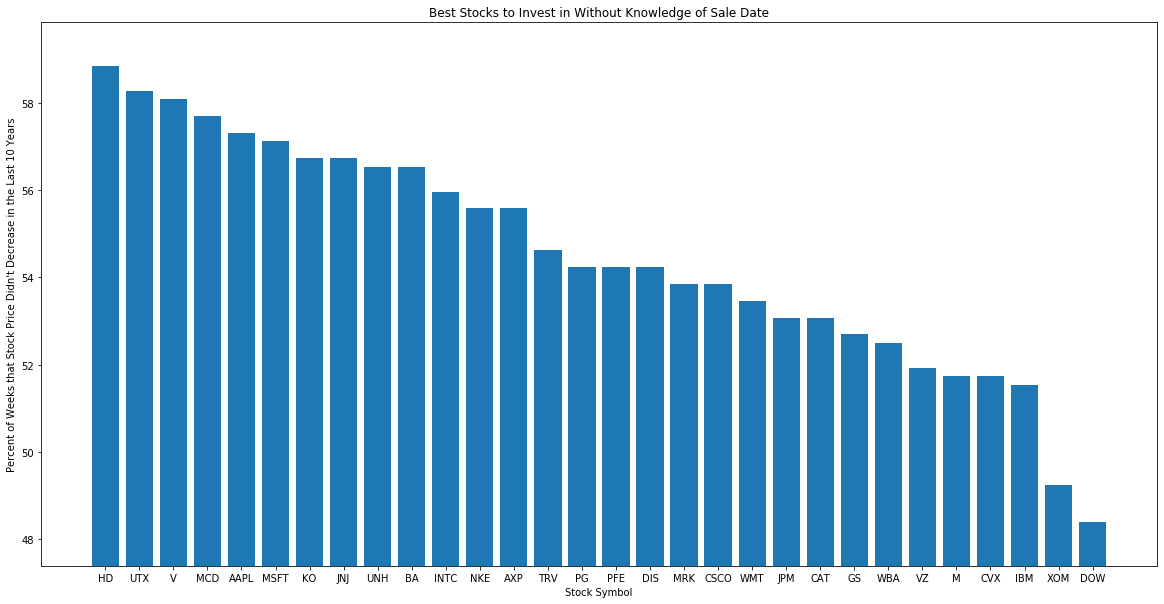

In [39]:
# import relevant libraries
import pandas as pd
import numpy as np
from os import listdir
from datetime import date, timedelta
import matplotlib.pyplot as plt
# load the name of each stock
stock_names = [n[:-4] for n in listdir('data')]
# load each stock and calculate percent change week by week for the last ten years
stocks = []
for n in stock_names:
    stock = pd.read_csv('data/'+n+'.csv')
    stock['Date'] = pd.to_datetime(stock['Date'],yearfirst=True)
    stock = stock[stock['Date'] >= date.today()-timedelta(3650)]
    stocks.append(stock['Close'].pct_change().dropna().values)
# calculate the percent of weeks each stock didn't decrease
good_week_percent = [np.sum(s>=0)/s.size*100 for s in stocks]
# sort stocks by good week percent
good_week_percent,stock_names = zip(*sorted(zip(good_week_percent,stock_names),reverse=True))
# plot the stocks
plt.figure(figsize=(20,10))
plt.bar(stock_names,good_week_percent)
plt.ylim(min(good_week_percent)-1,max(good_week_percent)+1)
plt.xlabel('Stock Symbol')
plt.ylabel('Percent of Weeks that Stock Price Didn\'t Decrease in the Last 10 Years')
plt.title('Best Stocks to Invest in Without Knowledge of Sale Date')
plt.show()